Tutorial for generating CFXs with PyCFX, using a Keras model.

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from pycfx.datasets import *
from pycfx.models import *
from pycfx.benchmarker import *
from pycfx.helpers.visualisation import *
from pycfx.conformal import *
from pycfx.counterfactual_explanations import *

In [ ]:
# Initialise dataset

Dataset = SyntheticBimodal
dataset_kwargs = {"size": 4}
factual = np.array([0, 4])
y_target = 1 

<Axes: >

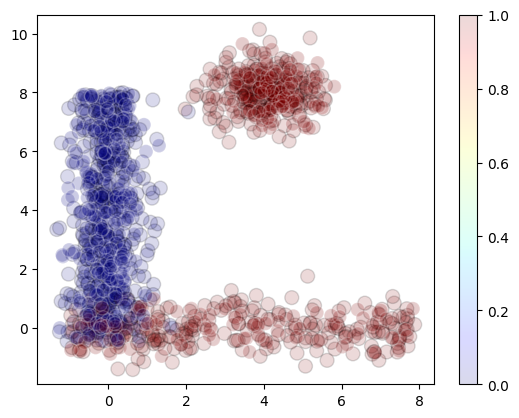

In [ ]:
# Visualise dataset

dataset = Dataset(0.6, 0.2, 0.2, **dataset_kwargs)
X_train, y_train, X_calib, y_calib, X_test, y_test = dataset.get_X_y_split()
plot_split_dataset(X_train, X_test, y_train, y_test)

In [ ]:
# Load or train model

model = KerasMLP(config={}, input_properties=dataset.input_properties)
model.load_or_train(Path("mlp_keras_bimodal_data"), X_train, y_train, True)

/Users/abilkhoo/mambaforge/envs/confexplus/lib/python3.10/site-packages/keras/pycfx/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Visualise decision boundary
    
plot_decision_boundary(model, X_train, X_test, y_train, y_test)

<Axes: >

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2688232
Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Set parameter TimeLimit to value 60
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 59 rows, 108 columns and 266 nonzeros
Model fingerprint: 0xe3219bac
Model has 50 general constraints
Variable types: 108 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [4e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-02, 4e+00]
Presolve added 46 rows and 96 columns
Presolve time: 0.00s
Presolved: 105 rows, 204 columns, 358 nonzeros
Presolved model has 100 SOS constraint(s)
Variable types: 104 contin

<Axes: >

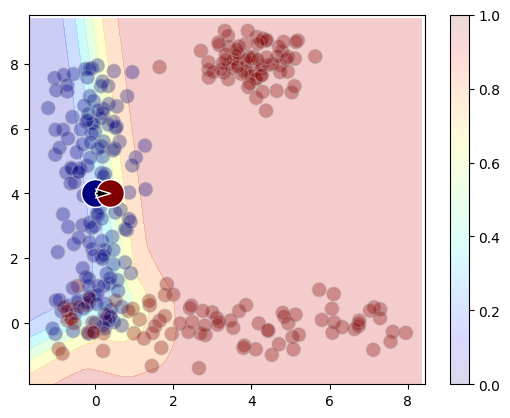

In [ ]:
#Obtain Min Distance CFX

mindist_gen = MinDistanceCF(model, dataset.input_properties, config={"db_distance":0.05})
mindist_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = mindist_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib, faded_background=True)

<Axes: >

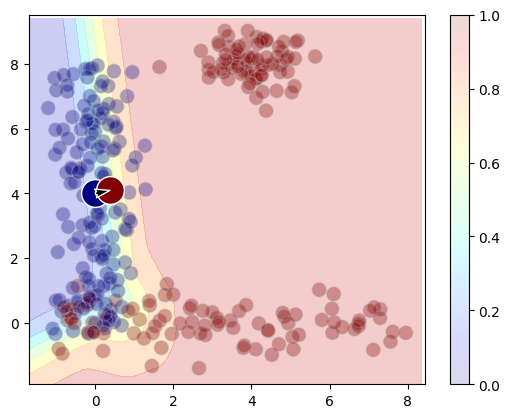

In [ ]:
#Obtain Nearest Neighbour CFX

nn_gen = NearestNeighbourCF(model, dataset.input_properties, config={})
nn_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = nn_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib, faded_background=True)

<Axes: >

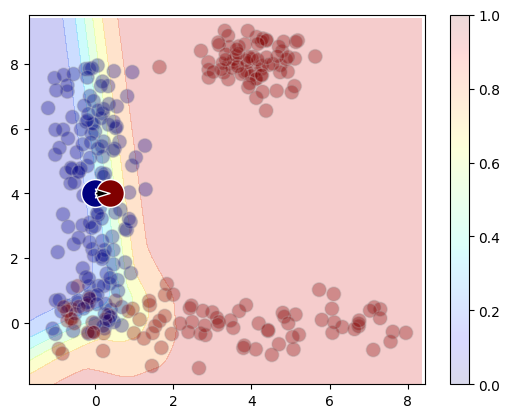

In [ ]:
#Obtain Wachter CFX

wachter_gen = WachterGenerator(model, dataset.input_properties, {})
wachter_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = wachter_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib)

<Axes: >

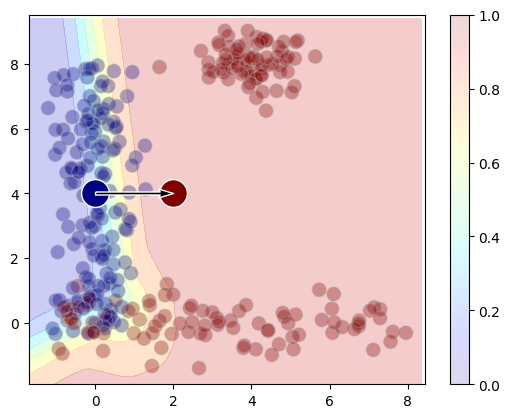

In [ ]:
#Obtain Schut CFX. Note that this is more of a greedy CFX since we have not used an ensemble of models.

schut_gen = SchutGenerator(model, dataset.input_properties, {"lr":0.002})
schut_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = schut_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib)

In [ ]:
#Obtain ECCCo CFX

eccco_gen = ECCCOGenerator(model, dataset.input_properties, config={})
eccco_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = eccco_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib)

<Axes: >

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 72 rows, 152 columns and 391 nonzeros
Model fingerprint: 0x92785fe9
Model has 3 quadratic constraints
Model has 168 general constraints
Variable types: 123 continuous, 29 integer (29 binary)
Coefficient statistics:
  Matrix range     [4e-03, 1e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-06, 4e+00]
  GenCon rhs range [3e-02, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 94 rows and 18 columns
Presolve time: 0.01s
Presolved: 166 rows, 170 columns, 1118 nonzeros
Presolved model has 16 SOS constraint(s)
Variable types: 111 continuous, 59 integer (59 binary)
Found heuris

<Axes: >

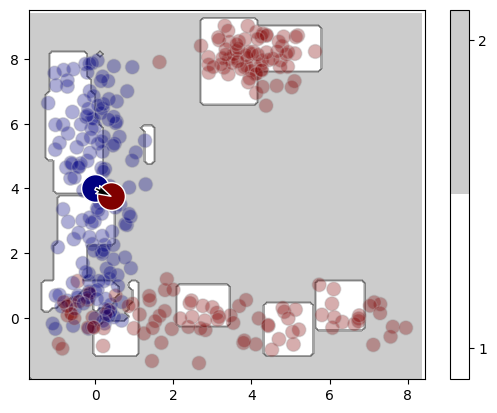

In [ ]:
#Obtain Schut CFX. Note that this is more of a greedy CFX since we have not used an ensemble of models.

conformalCF_c = ConformalCF(model, dataset.input_properties, config={"conformal_class": ConformalCONFEXTree, "conformal_config": ccf2})
conformalCF_c.setup(X_train, y_train, X_calib, y_calib)
counterfactual_conformal_c = conformalCF_c.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual_conformal_c, model, X_calib, X_calib, y_calib, y_calib, conformal=conformalCF_c.conformal)